## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [55]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [56]:
# Combine the data into a single dataset
combined_pharma_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_pharma_df.shape

(1893, 8)

In [57]:
# Checking the number of mice.
mice_count=combined_pharma_df["Mouse ID"].nunique()
mice_count

249

In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_pharma_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')
duplicate_mice.value_counts()

False    1888
True        5
dtype: int64

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_pharma_df[combined_pharma_df.duplicated(['Mouse ID','Timepoint'] , keep ='first')] 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pharma_df=combined_pharma_df.drop_duplicates(['Mouse ID','Timepoint'] , keep ='first') 
clean_pharma_df.shape

(1888, 8)

In [61]:
clean_pharma_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [62]:
clean_pharma_df.isnull().values.any()

False

In [63]:
# Checking the number of mice in the clean DataFrame.
clean_pharma_df["Mouse ID"].nunique()

249

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_clean_pharma_df=clean_pharma_df.groupby("Drug Regimen")
tumor_volume = grouped_clean_pharma_df["Tumor Volume (mm3)"]

In [65]:
avg_tumor_volume=tumor_volume.mean()
avg_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [66]:
median_tumor_volume=tumor_volume.median()
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [67]:
variance_tumor_volume = clean_pharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [68]:
st_dev_tumor_volume = clean_pharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
st_dev_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [69]:
sem_tumor_volume = clean_pharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_tumors_by_regimen = pd.DataFrame({"Mean": avg_tumor_volume, "Median": median_tumor_volume,
                                "Variance": variance_tumor_volume, "St Dev": st_dev_tumor_volume, "SEM": sem_tumor_volume})
mice_tumors_by_regimen

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_regimen_df=clean_pharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median', 'var', 'std', 'sem'])
agg_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [72]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

x_axis_bar = clean_pharma_df["Drug Regimen"].unique()
y_axis_bar = clean_pharma_df.groupby("Drug Regimen")["Timepoint"].count()
bar_chart_df = pd.DataFrame({"Drug Regimens": x_axis_bar, "Number of Timepoints": y_axis_bar})
bar_chart_df

,Drug Regimens,Number of Timepoints
Drug Regimen,,
Capomulin,Ramicane,230
Ceftamin,Capomulin,178
Infubinol,Infubinol,178
Ketapril,Placebo,188
Naftisol,Ceftamin,186
Placebo,Stelasyn,181
Propriva,Zoniferol,156
Ramicane,Ketapril,228
Stelasyn,Propriva,181


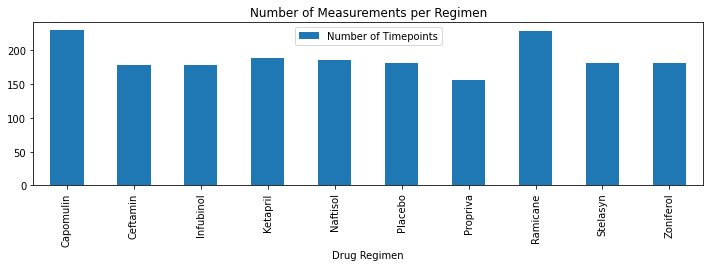

In [73]:
bar_chart_df.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per Regimen')

Text(0, 0.5, 'Number of Measurements')

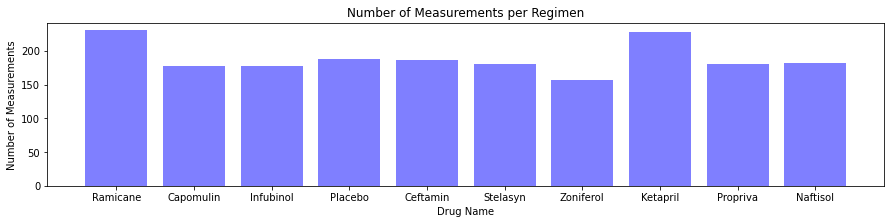

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(15,3))
plt.bar(x_axis_bar, y_axis_bar, color='b', alpha=0.5, align="center")
plt.title("Number of Measurements per Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Measurements")

In [75]:
clean_pharma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


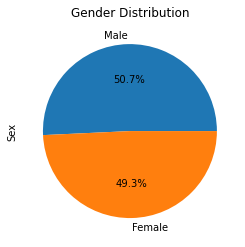

In [76]:
pandas_pie=clean_pharma_df["Sex"].value_counts()
pandas_pie.plot(kind='pie', autopct='%1.1f%%', title="Gender Distribution")
plt.show()

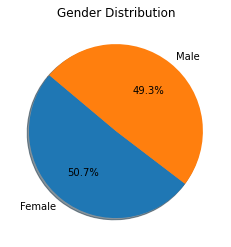

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pandas_pie, labels = ["Female", "Male"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint_per_mouse=clean_pharma_df.groupby("Mouse ID")[["Timepoint"]].max()
latest_timepoint_per_mouse

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [79]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = latest_timepoint_per_mouse.merge(clean_pharma_df, on = ["Mouse ID"])
merged_df = merged_df.rename(columns={"Timepoint_x":"Timepoints", "Timepoint_y":"Last Timepoint"})
merged_df.sample(10)

,Mouse ID,Timepoints,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Tumor Volume (mm3),Metastatic Sites
826,k754,20,Zoniferol,Female,8,26,5,45.727760,0
739,j755,45,Naftisol,Male,23,27,20,55.496608,1
1255,q597,45,Ramicane,Male,20,25,45,45.220869,2
792,k382,45,Ketapril,Male,22,29,35,66.079185,4
1740,x581,45,Ceftamin,Female,19,28,25,51.935283,3
1088,o302,30,Placebo,Female,2,29,30,62.030594,1
1100,o523,10,Propriva,Female,6,25,5,45.544700,0
1718,x401,45,Capomulin,Female,16,15,15,39.776250,0
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2
1845,z435,10,Propriva,Female,12,26,0,45.000000,0


In [80]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol=merged_df.loc[merged_df["Drug Regimen"]==drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound=lower_q - (1.5*iqr)
    upper_bound=upper_q + (1.5*iqr)
    outliers=final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1386    25.472143
1387    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 804    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


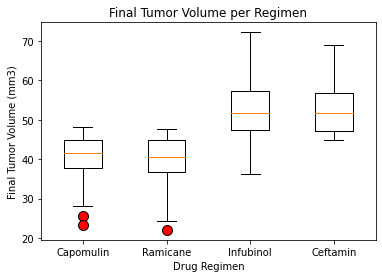

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
rate=dict(markerfacecolor='red', markersize=10)
plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops=rate)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Final Tumor Volume per Regimen')
plt.show()

## Line and Scatter Plots

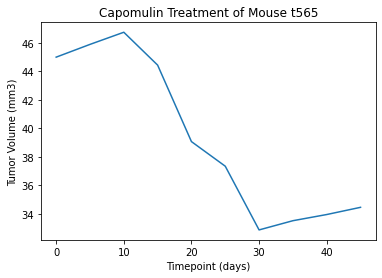

In [82]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_volume_capomulin=clean_pharma_df.loc[clean_pharma_df['Drug Regimen']=='Capomulin']
data=tumor_volume_capomulin.loc[tumor_volume_capomulin['Mouse ID']=='t565']
plt.plot(data['Timepoint'],data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title ('Capomulin Treatment of Mouse t565')
plt.show()

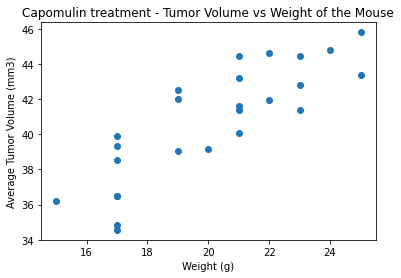

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_volume_capomulin=clean_pharma_df.loc[clean_pharma_df['Drug Regimen']=='Capomulin']
average=tumor_volume_capomulin.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatment - Tumor Volume vs Weight of the Mouse')
plt.show()

## Correlation and Regression

Correlation between weight and average tumor volume is 0.84


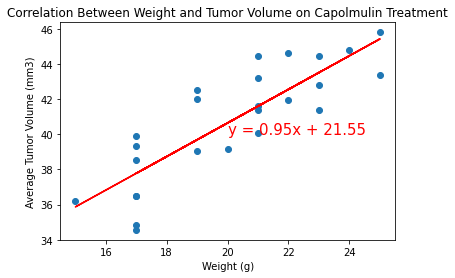

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor=round(st.pearsonr(average['Weight (g)'], average['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between weight and average tumor volume is {cor}")
model=st.linregress(average['Weight (g)'], average['Tumor Volume (mm3)'])
y_values=average['Weight (g)']*model[0]+model[1]
x_values=average['Weight (g)']
plt.scatter(x_values, average['Tumor Volume (mm3)'])
plt.plot(x_values, y_values, color="red")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation Between Weight and Tumor Volume on Capolmulin Treatment')
plt.show()